<a href="https://colab.research.google.com/github/Kavya-K-S/DAUP/blob/main/Completed_data_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **TITANIC DATASET**



In [ ]:
import pandas as pd
titanic_df=pd.read_csv('titanic.csv')
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Count missing values
titanic_df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


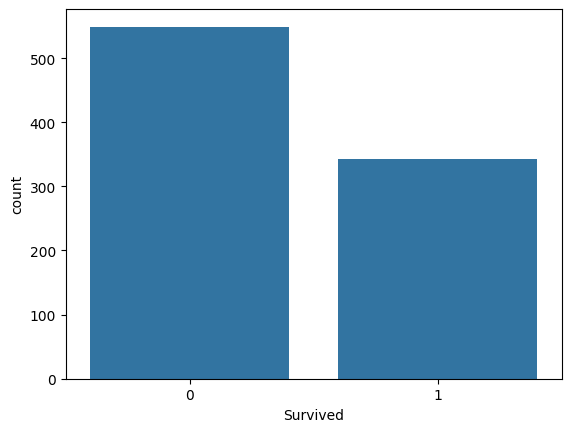

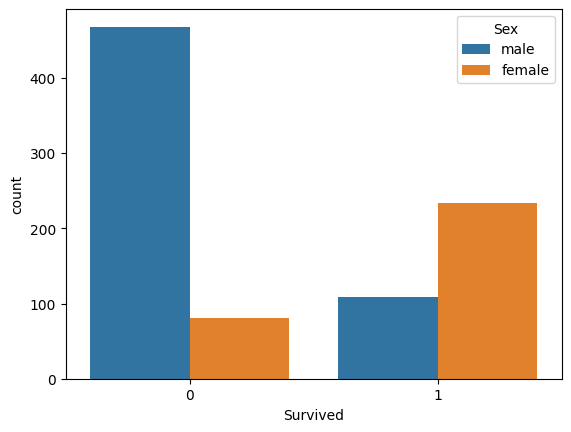

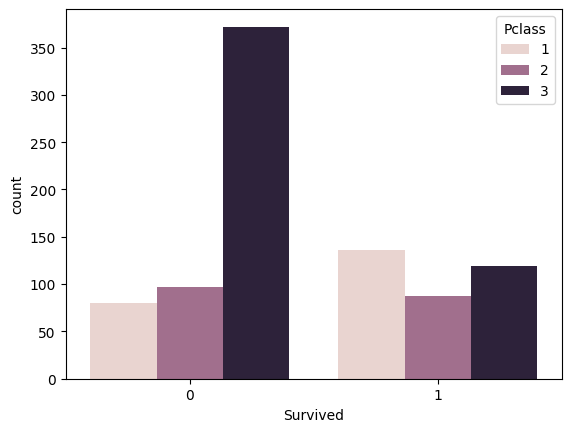

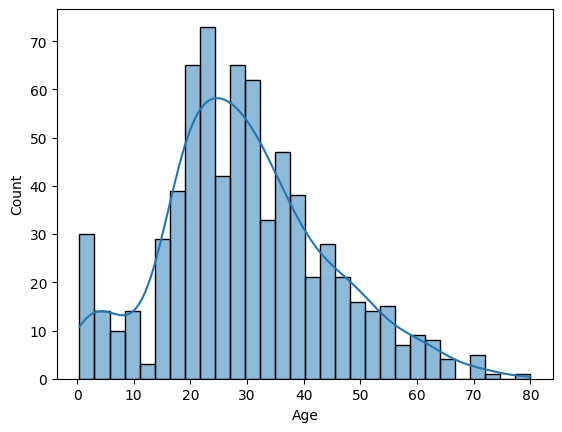

In [ ]:
# Survival count
sns.countplot(x="Survived", data=titanic_df)
plt.show()

# Survival by Gender
sns.countplot(x="Survived", hue="Sex", data=titanic_df)
plt.show()

# Survival by Passenger Class
sns.countplot(x="Survived", hue="Pclass", data=titanic_df)
plt.show()

# Age Distribution
sns.histplot(titanic_df["Age"].dropna(), bins=30, kde=True)
plt.show()


Replacing Missing values

In [ ]:
titanic_clean = titanic_df.copy()


In [ ]:
# 1. Fill missing Age with median
titanic_clean['Age'].fillna(titanic_clean['Age'].median(), inplace=True)
# 2. Fill missing Embarked with mode
titanic_clean['Embarked'].fillna(titanic_clean['Embarked'].mode()[0], inplace=True)
# 3. Drop Cabin column (too many missing values)
titanic_clean.drop(columns=['Cabin'], inplace=True)


/tmp/ipython-input-2445300594.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_clean['Age'].fillna(titanic_clean['Age'].median(), inplace=True)
/tmp/ipython-input-2445300594.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [ ]:
# Check if missing values remain
print(titanic_clean.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


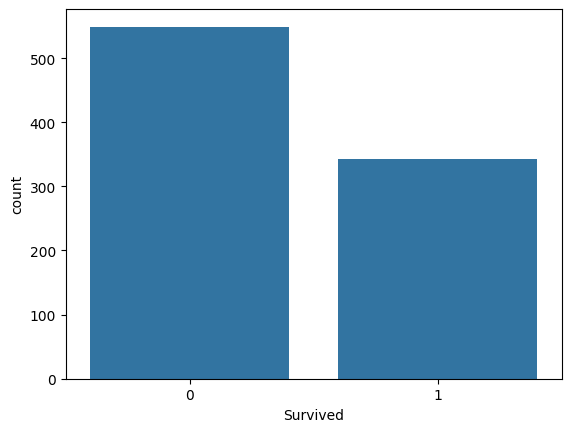

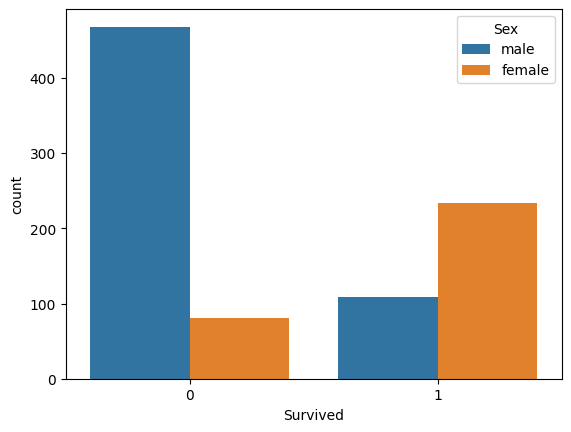

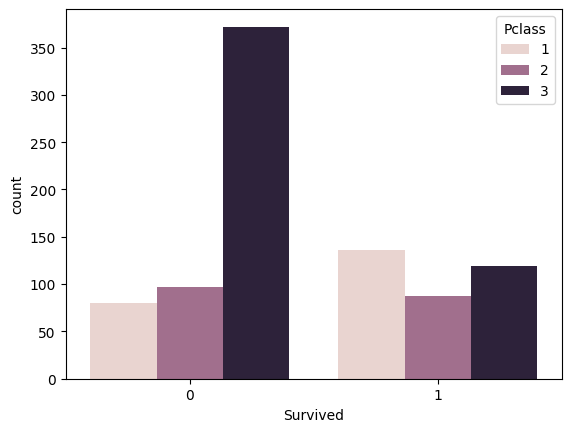

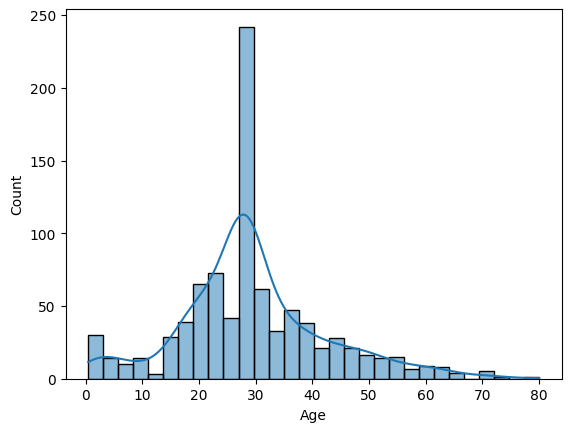

In [ ]:
# Survival count
sns.countplot(x="Survived", data=titanic_clean)
plt.show()

# Survival by Gender
sns.countplot(x="Survived", hue="Sex", data=titanic_clean)
plt.show()

# Survival by Passenger Class
sns.countplot(x="Survived", hue="Pclass", data=titanic_clean)
plt.show()

# Age Distribution
sns.histplot(titanic_clean["Age"].dropna(), bins=30, kde=True)
plt.show()

**AIR QUALITY**

In [ ]:
df = pd.read_excel("AirQualityUCI.xlsx")
print(df.head())

        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  
0  13.60  48.875001  0.757754  
1  13.30  47.700000  0.725487  
2  11.90  53.975000 

In [ ]:
print(df.isnull().sum())

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


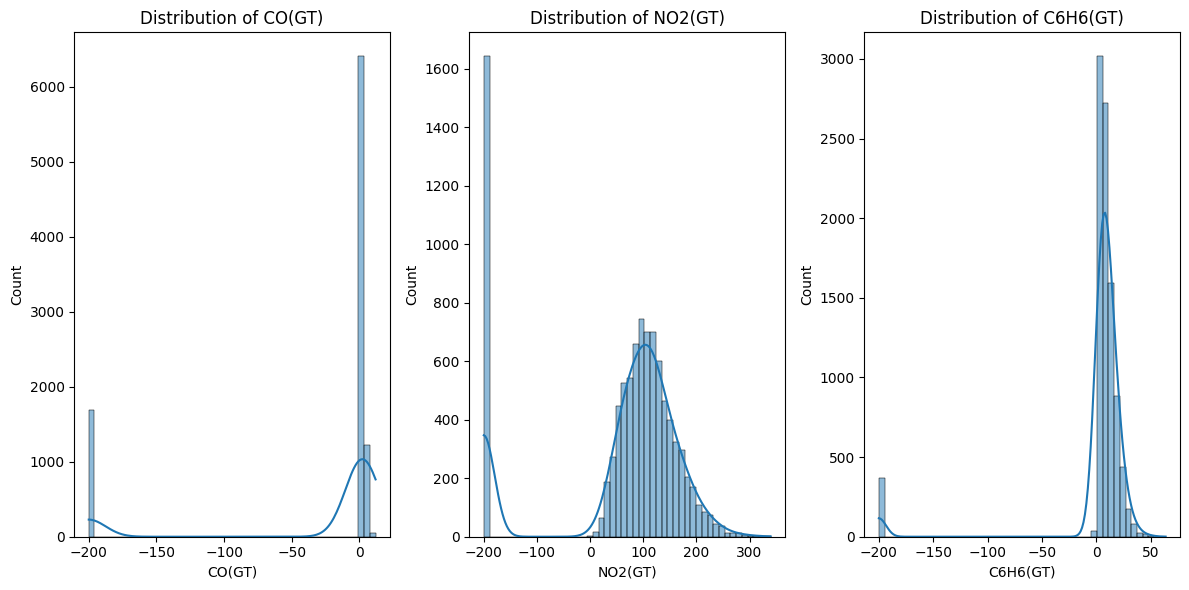

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

pollutants = ["CO(GT)", "NO2(GT)", "C6H6(GT)"]

plt.figure(figsize=(12,6))
for i, col in enumerate(pollutants, 1):
    plt.subplot(1,3,i)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()



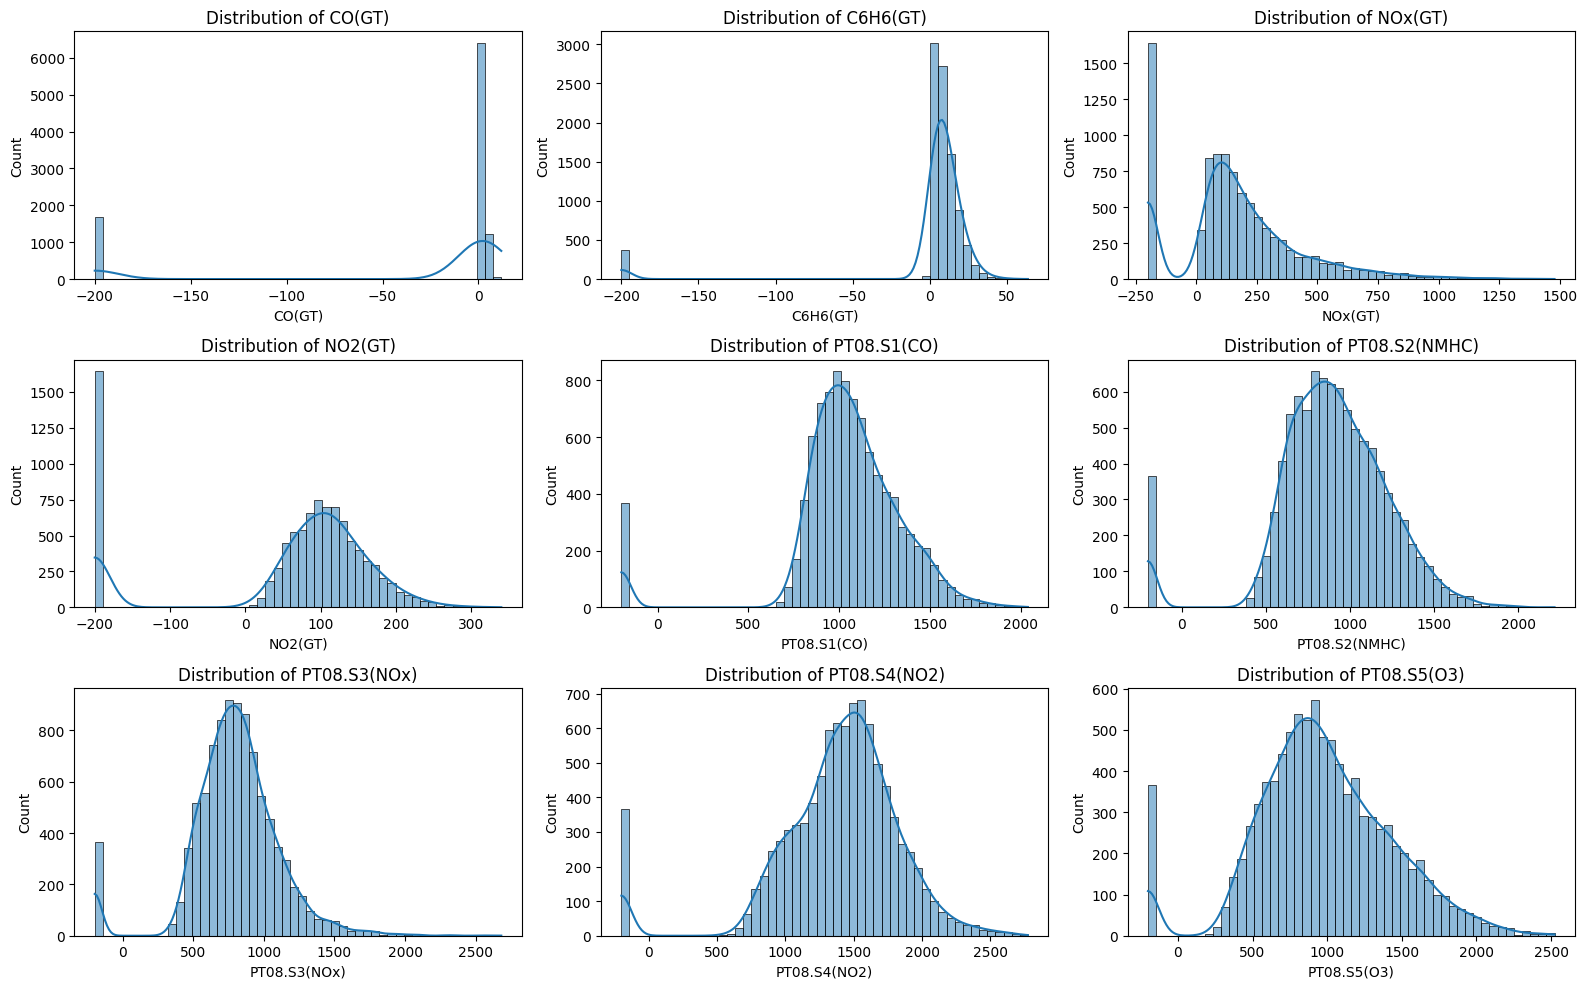

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

pollutants = ["CO(GT)", "C6H6(GT)", "NOx(GT)", "NO2(GT)", "PT08.S1(CO)", "PT08.S2(NMHC)", "PT08.S3(NOx)", "PT08.S4(NO2)", "PT08.S5(O3)"]

plt.figure(figsize=(16,10))
for i, col in enumerate(pollutants, 1):
    plt.subplot(3,3,i)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


**ADULT**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
col_names = [
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race", "sex",
    "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"
]


In [ ]:
train_data = pd.read_csv("adult.data", header=None, names=col_names,
                         na_values="?", skipinitialspace=True)
test_data = pd.read_csv("adult.test", header=0, names=col_names,
                        na_values="?", skipinitialspace=True)
train_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data = pd.concat([train_data, test_data], axis=0)

In [ ]:
# Strip extra spaces
for col in data.select_dtypes(include=["object"]).columns:
    data[col] = data[col].str.strip()

In [ ]:
# 1. Check missing values
print("\nMissing values count:\n", data.isnull().sum())
print("\nTotal missing values:", data.isnull().sum().sum())


Missing values count:
 age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
income               0
dtype: int64

Total missing values: 6465


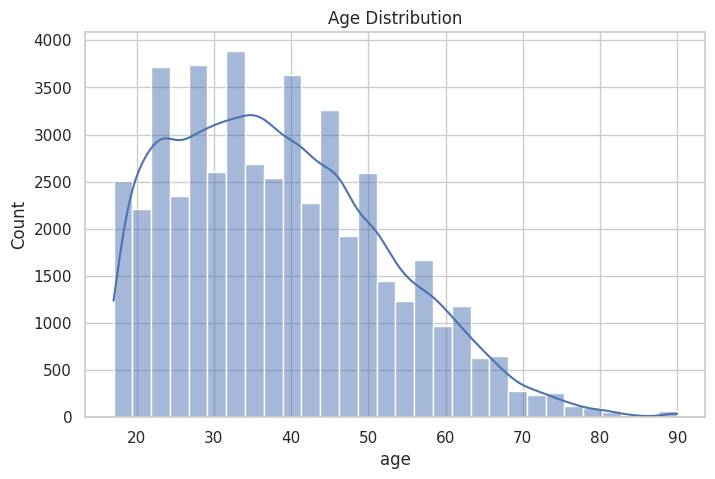

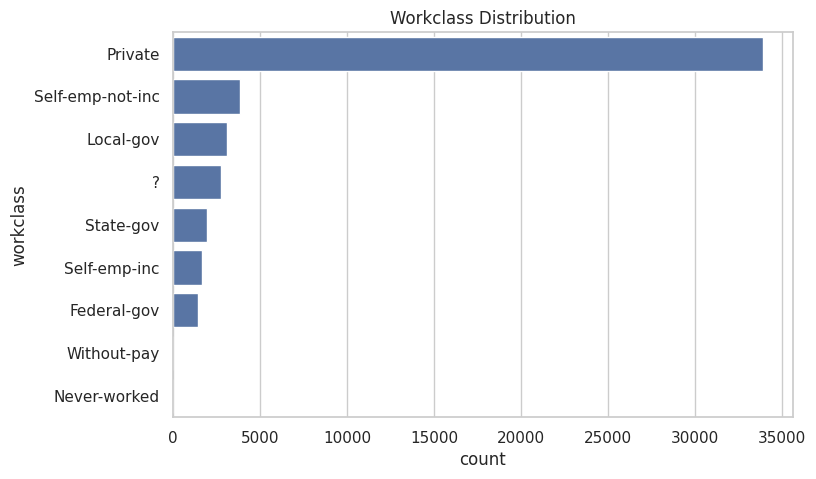

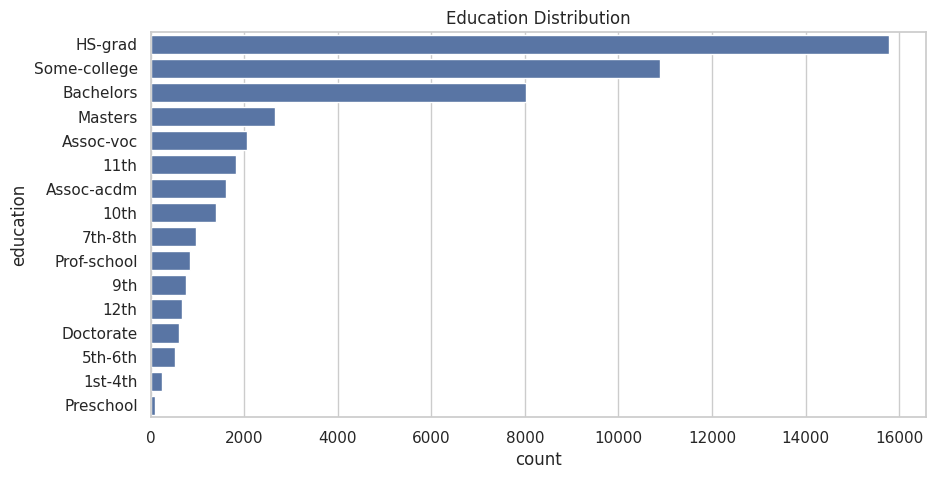

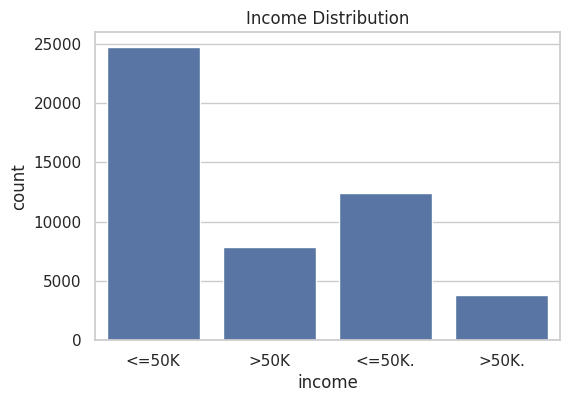

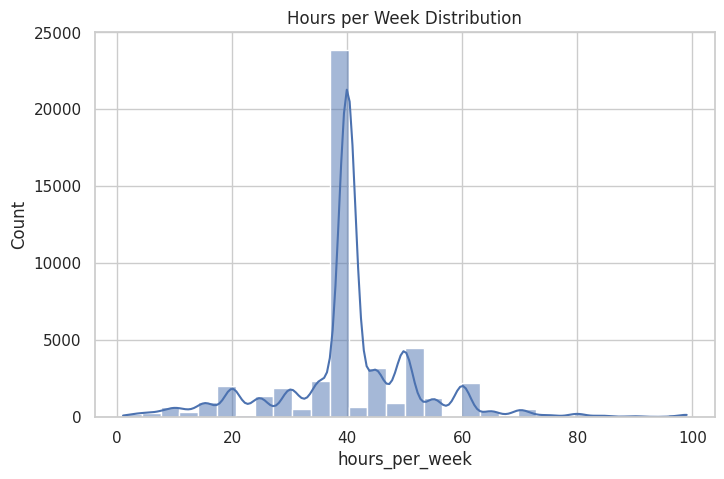

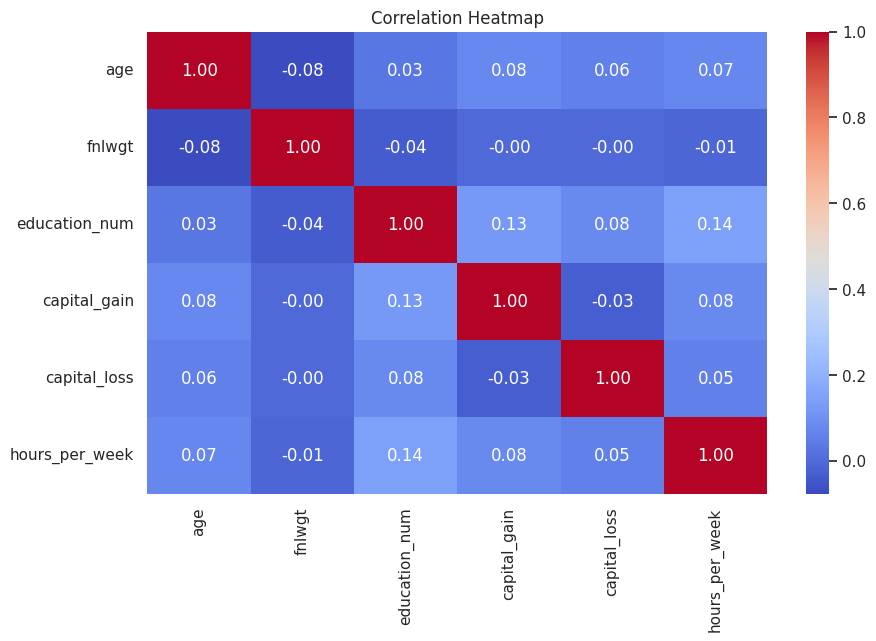

In [ ]:
sns.set(style="whitegrid")

# Age distribution
plt.figure(figsize=(8,5))
sns.histplot(data["age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

# Workclass distribution
plt.figure(figsize=(8,5))
sns.countplot(y="workclass", data=data,
              order=data["workclass"].value_counts().index)
plt.title("Workclass Distribution")
plt.show()

# Education distribution
plt.figure(figsize=(10,5))
sns.countplot(y="education", data=data,
              order=data["education"].value_counts().index)
plt.title("Education Distribution")
plt.show()

# Income distribution
plt.figure(figsize=(6,4))
sns.countplot(x="income", data=data)
plt.title("Income Distribution")
plt.show()

# Hours per week distribution
plt.figure(figsize=(8,5))
sns.histplot(data["hours_per_week"], bins=30, kde=True)
plt.title("Hours per Week Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.select_dtypes(include=["int64", "float64"]).corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
for col in data.columns:
    if data[col].isnull().sum() > 0:
        if data[col].dtype == "object":
            # fill with mode
            data[col].fillna(data[col].mode()[0], inplace=True)
        else:
            # fill with median
            data[col].fillna(data[col].median(), inplace=True)
print("\nMissing values count:\n", data.isnull().sum())
print("\nTotal missing values:", data.isnull().sum().sum())


Missing values count:
 age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

Total missing values: 0


**Breast Cancer**

In [ ]:
# 1. Read the dataset
col_names = [
    "id", "clump_thickness", "uniformity_cell_size",
    "uniformity_cell_shape", "marginal_adhesion",
    "single_epithelial_cell_size", "bare_nuclei",
    "bland_chromatin", "normal_nucleoli",
    "mitoses", "class"
]

In [ ]:
data = pd.read_csv(
    "breast-cancer-wisconsin.data",
    header=None,
    names=col_names,
    na_values="?",
    skipinitialspace=True
)


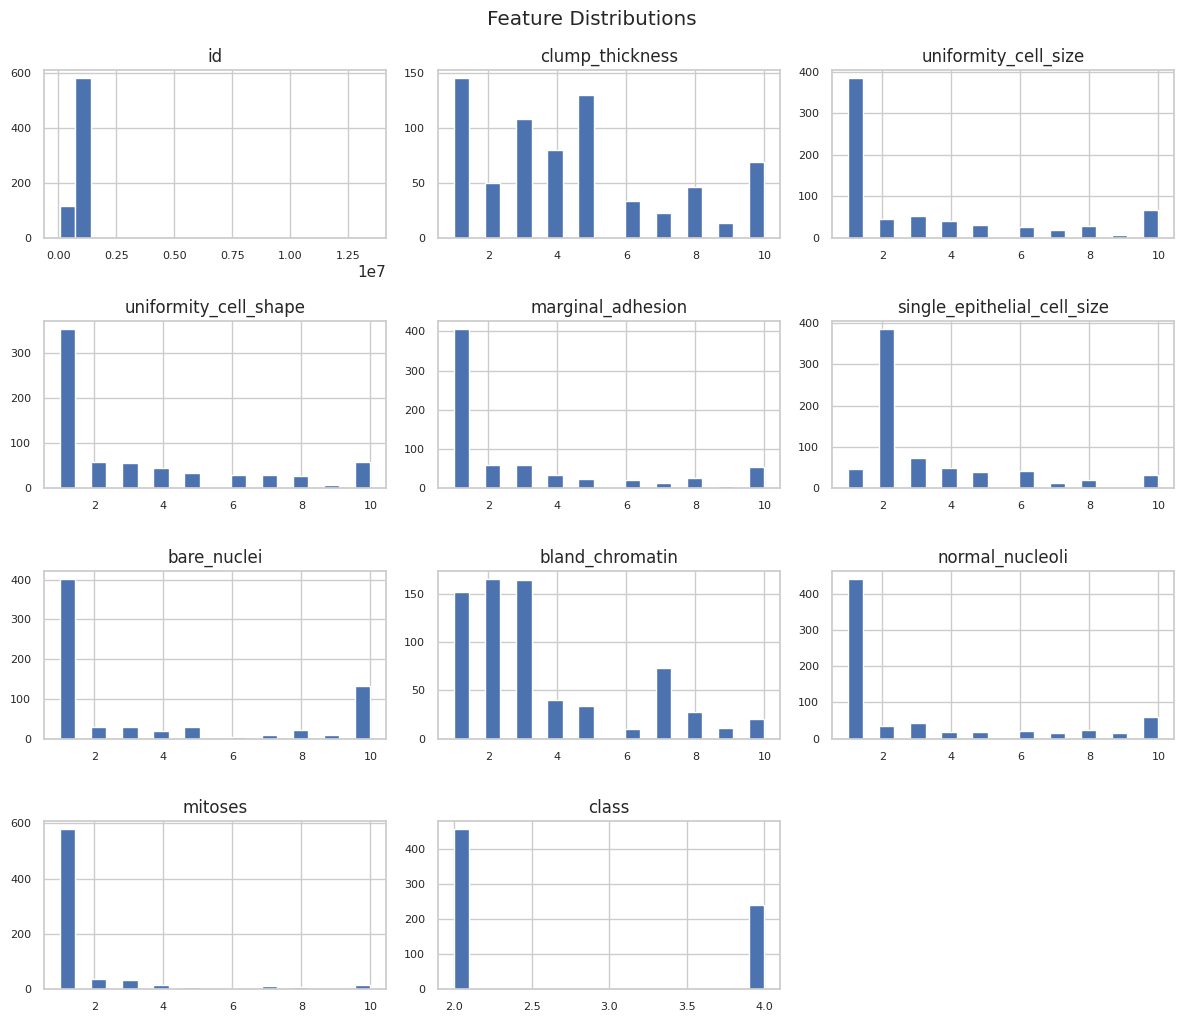

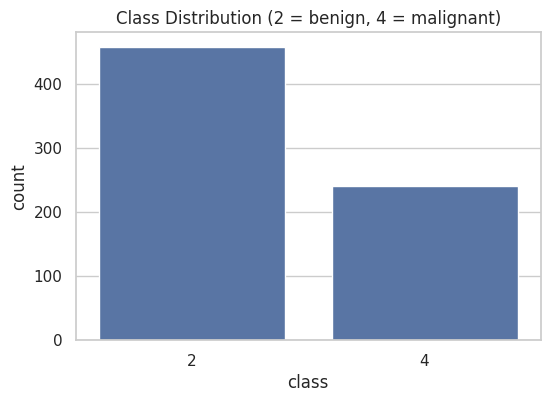

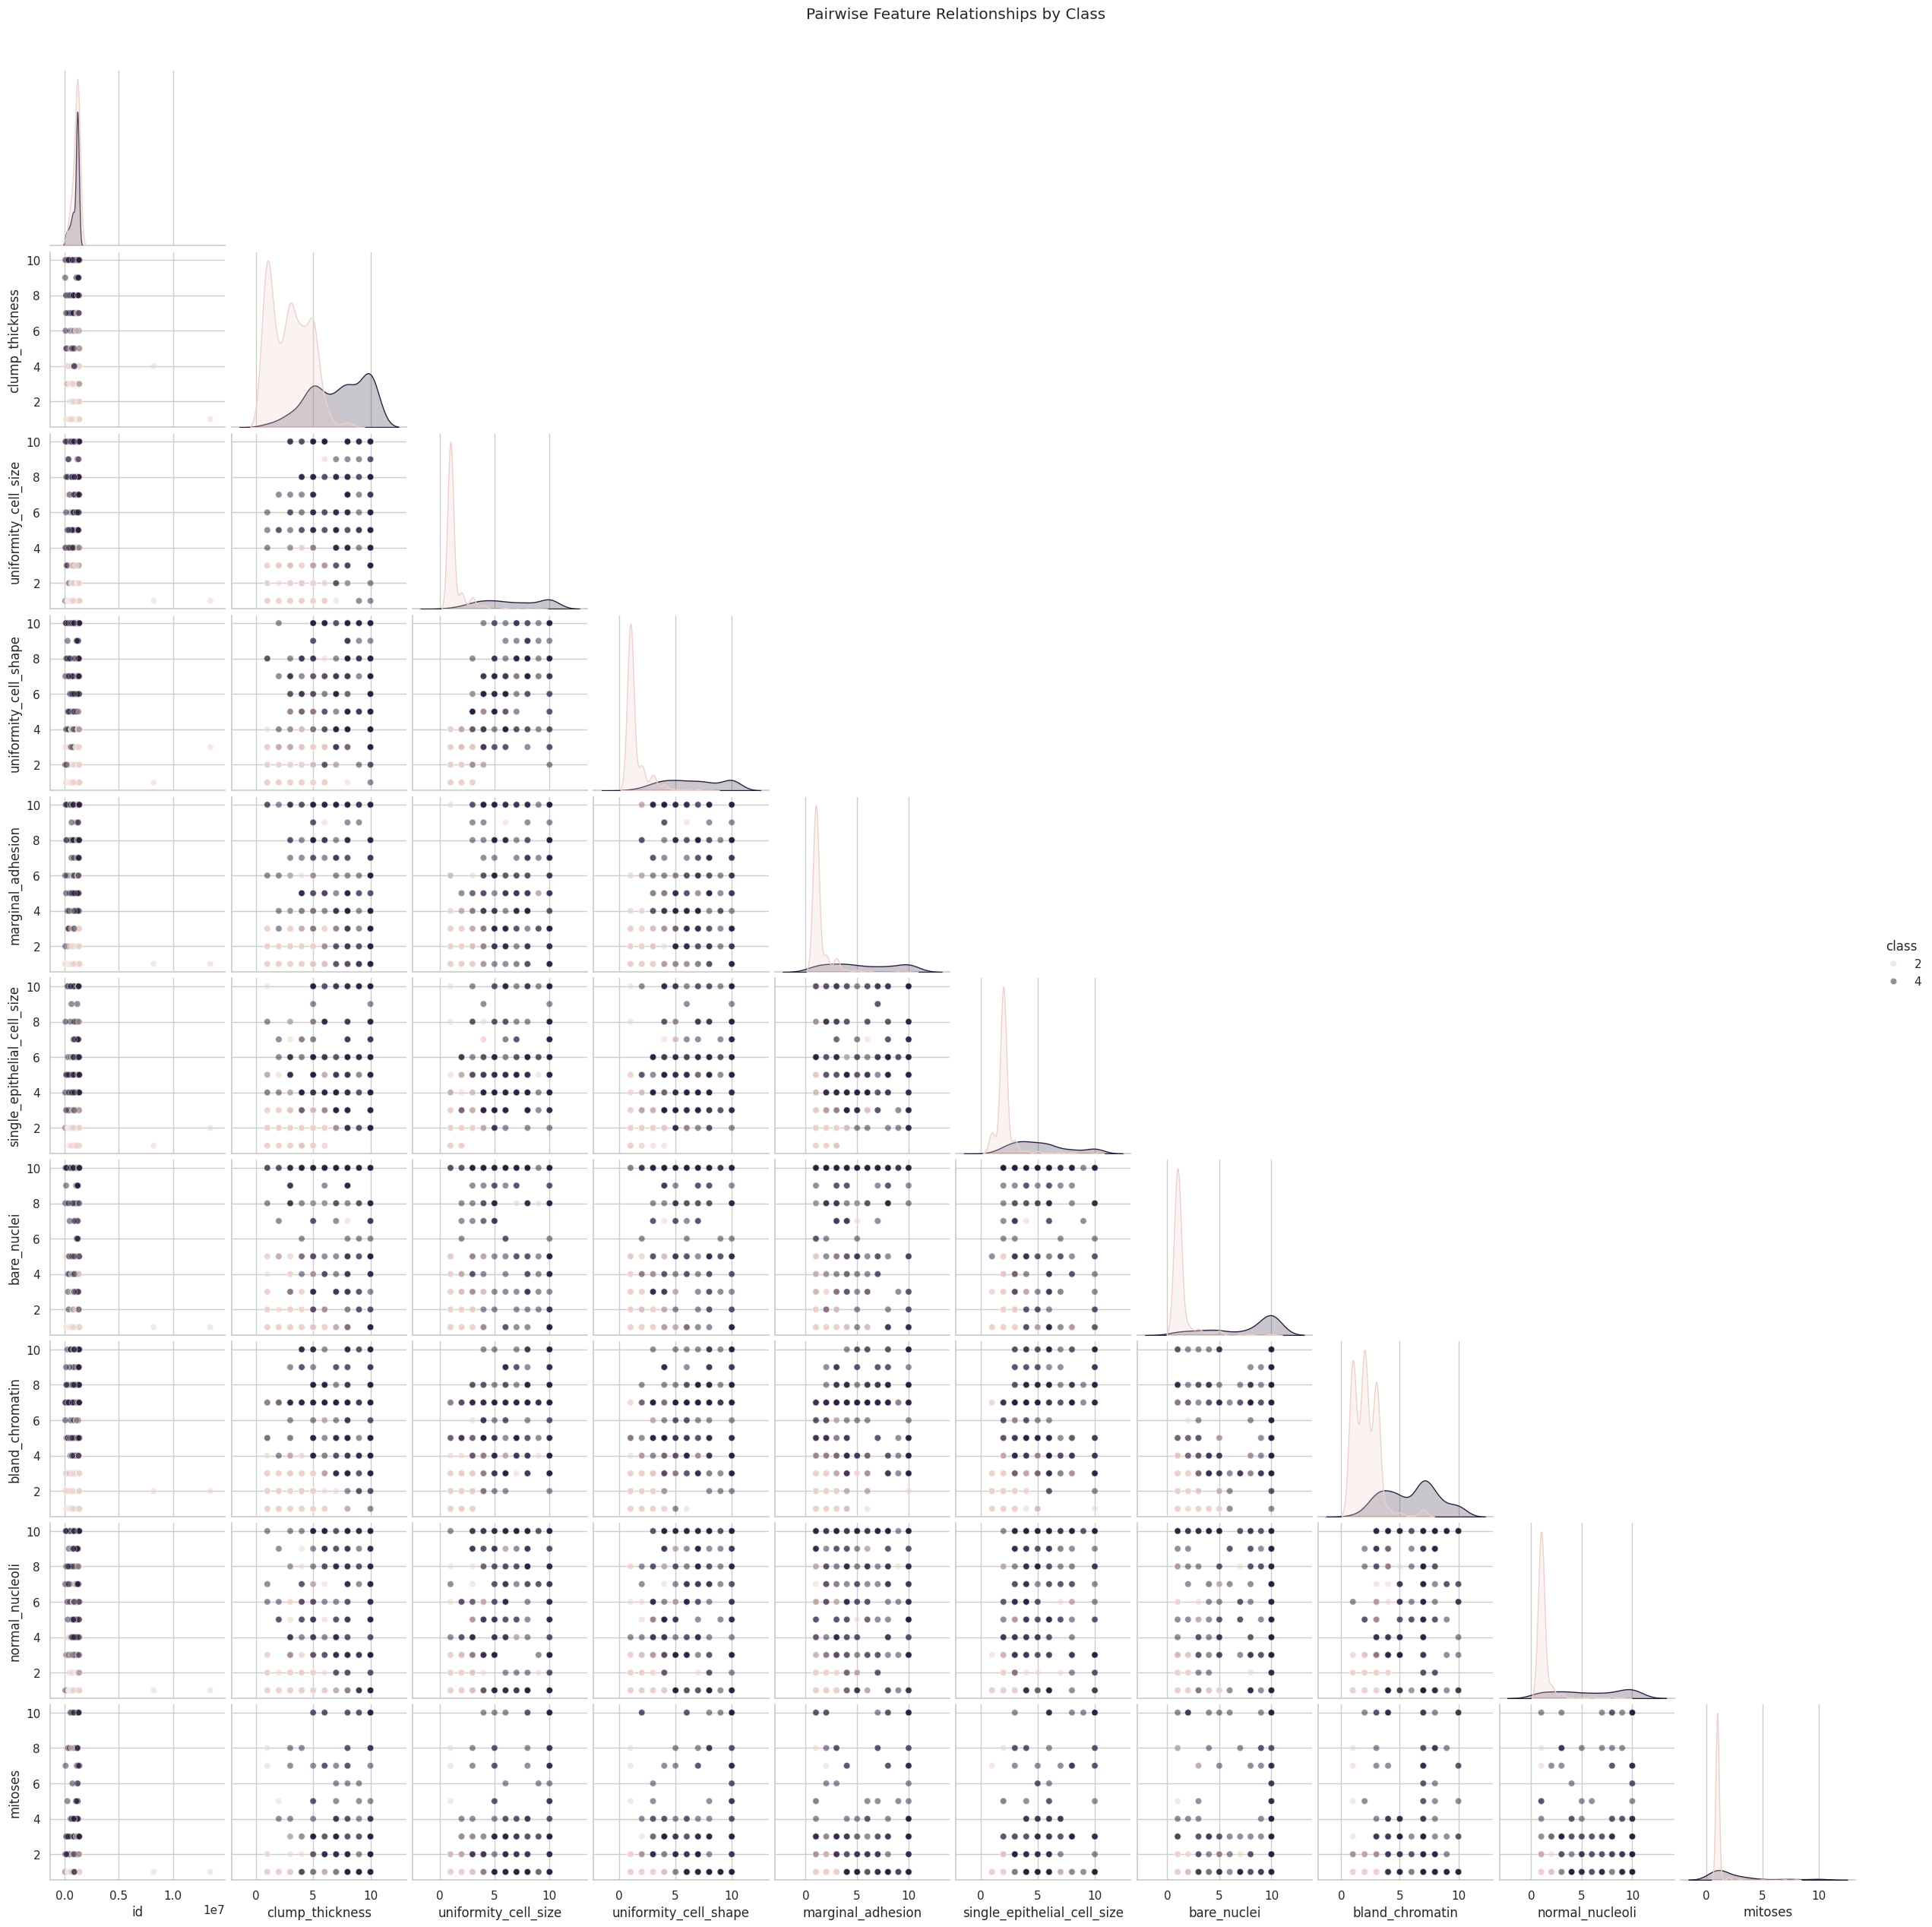

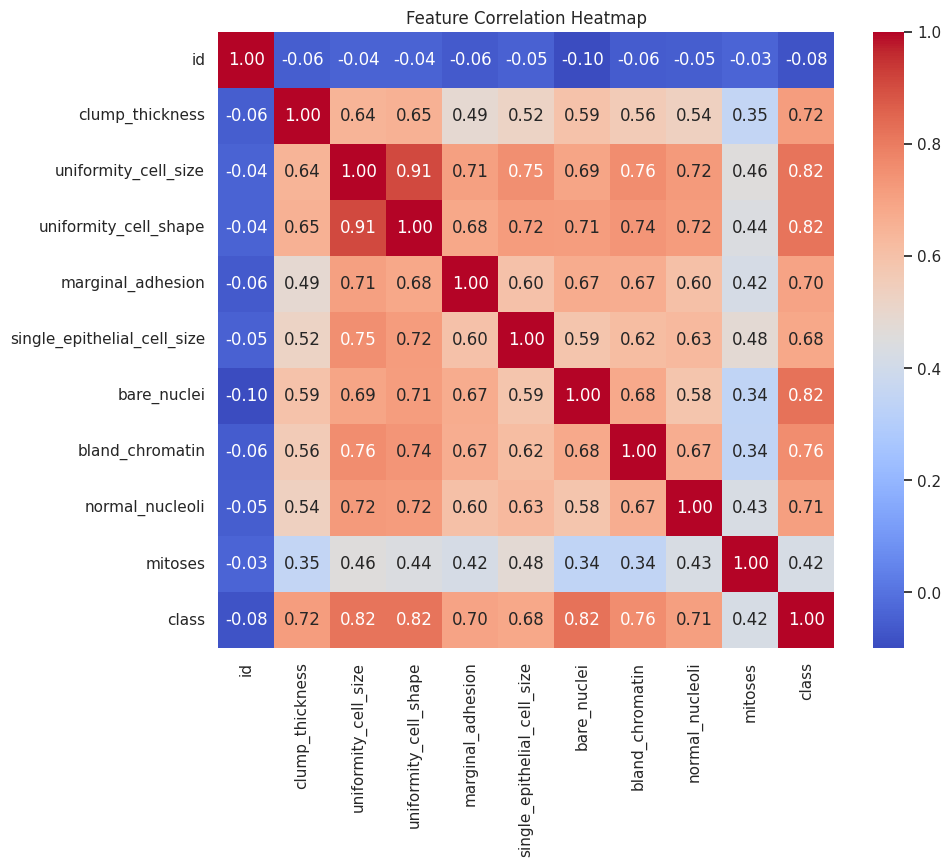

In [ ]:

# Distribution of numeric features
data.hist(figsize=(12, 10), bins=20, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.suptitle("Feature Distributions", y=1.02)
plt.show()

# Count plot of target classes
plt.figure(figsize=(6, 4))
sns.countplot(x="class", data=data)
plt.title("Class Distribution (2 = benign, 4 = malignant)")
plt.show()

# Pairplot colored by class
sns.pairplot(data, hue="class", vars=data.columns[:-1], corner=True, plot_kws={"alpha": 0.5})
plt.suptitle("Pairwise Feature Relationships by Class", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
print("Missing values per column:\n", data.isnull().sum(), "\n")
print("Total missing values:", data.isnull().sum().sum(), "\n")


Missing values per column:
 id                              0
clump_thickness                 0
uniformity_cell_size            0
uniformity_cell_shape           0
marginal_adhesion               0
single_epithelial_cell_size     0
bare_nuclei                    16
bland_chromatin                 0
normal_nucleoli                 0
mitoses                         0
class                           0
dtype: int64 

Total missing values: 16 



In [ ]:
if data["bare_nuclei"].isnull().any():
    mode_bn = data["bare_nuclei"].mode()[0]
    data["bare_nuclei"].fillna(mode_bn, inplace=True)
    print(f"Filled 'bare_nuclei' missing values with mode: {mode_bn}\n")
data.drop(columns=["id"], inplace=True)

In [ ]:
for col in data.columns[:-1]:  # exclude the 'class' column
    data[col] = data[col].astype(int)

In [ ]:
print("Missing values per column:\n", data.isnull().sum(), "\n")
print("Total missing values:", data.isnull().sum().sum(), "\n")


Missing values per column:
 clump_thickness                0
uniformity_cell_size           0
uniformity_cell_shape          0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitoses                        0
class                          0
dtype: int64 

Total missing values: 0 

